# 데이터 전반적으로 둘러보기 및 미시적 지역 선택

In [1]:
import os
import sys 

sys.path.append(os.path.abspath("/content/drive/MyDrive/70sEnt"))

In [2]:
cd "/content/drive/MyDrive/70sEnt"

/content/drive/MyDrive/70sEnt


# import Package

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

import scipy.stats
from scipy.stats import pearsonr

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [12]:
# matplot lib에서 사용 가능한 한글 폰트
import matplotlib as mpl
plt.rc('font', family='NanumBarunGothic')
#set([i.name for i in mpl.font_manager.fontManager.ttflist])

# 전체 데이터 둘러보기

In [13]:
df = pd.read_csv('/content/drive/MyDrive/00_Aiffelton/데이터/20211022_수요예측_hackathon_data.csv', encoding='cp949')

- 시공간을 다룰 수 있고 다변량을 추가적으로 활용할 수 있는 모델이 효과적일 것으로 예상됨
- 모델 선정은 기본적인 EDA로 전반적인 데이터 특성을 본 후에 채택할 예정

## 1. time1, time2

In [15]:
df['time1'] = pd.to_datetime(df['time1'])
df['time2'] = pd.to_datetime(df['time2']) 

In [54]:
# df['time1'].min(), df['time1'].max()

In [55]:
# df['time2'].min(), df['time2'].max()

## 2. time3에 대한 오류 정정

In [ ]:
df['time3'] = df['time1'] - df['time2']

In [57]:
# df['time3'].min(), df['time3'].max()

- time3가 음수로 나타나는 데이터가 존재함

In [58]:
# df[df['time1'] < df['time2']]

- time1과 time2의 시점이 잘못된 데이터 파악됨
- 데이터 오류라고 판단됨
- 해당 데이터는 time1과 time2를 서로 바꿔줄 예정

In [27]:
df.loc[df['time1'] < df['time2'],['time1','time2']] = df.loc[df['time1'] < df['time2'],['time2','time1']].values

- time1, time2에 대한 데이터 오류 수정

In [28]:
df['time3'] = df['time1'] - df['time2']

## 3. 이용 시간

In [60]:
print('a시간 이내 사용자 : {:.2f} %'.format(len(df[df['time3'] < a]) / len(df) * 100))
print('b시간 이내 사용자 : {:.2f} %'.format(len(df[df['time3'] < b]) / len(df) * 100))
print('c시간 이내 사용자 : {:.2f} %'.format(len(df[df['time3'] < c]) / len(df) * 100))
print('d시간 이내 사용자 : {:.2f} %'.format(len(df[df['time3'] < d]) / len(df) * 100))
print('e시간 이내 사용자 : {:.2f} %'.format(len(df[df['time3'] < e]) / len(df) * 100))
print('f시간 이내 사용자 : {:.2f} %'.format(len(df[df['time3'] < f]) / len(df) * 100))
print('g시간 이내 사용자 : {:.2f} %'.format(len(df[df['time3'] < g]) / len(df) * 100))
print('h시간 이내 사용자 : {:.2f} %'.format(len(df[df['time3'] < h]) / len(df) * 100))
print('i시간 이내 사용자 : {:.2f} %'.format(len(df[df['time3'] < i]) / len(df) * 100))
print('j시간 이내 사용자 : {:.2f} %'.format(len(df[df['time3'] < j]) / len(df) * 100))

a시간 이내 사용자 : 92.63 %
b시간 이내 사용자 : 83.78 %
c시간 이내 사용자 : 78.56 %
d시간 이내 사용자 : 72.07 %
e시간 이내 사용자 : 59.52 %
f시간 이내 사용자 : 49.31 %
g시간 이내 사용자 : 36.31 %
h시간 이내 사용자 : 23.65 %
i시간 이내 사용자 : 9.69 %
j시간 이내 사용자 : 2.96 %


In [31]:
len(df[df['time3'] == 0)

28

- time3가 0인 데이터가 존재
- time3가 0인 데이터는 데이터적 오류라고 판단함
- 해당 데이터는 삭제 예정

In [32]:
df = df[df['time3'] > 0]

- 이용시간이 0인 데이터 삭제

## 4. 데이터 소실 파악

In [34]:
df['month'] = pd.to_datetime(df['time2']).dt.month
df['day'] = pd.to_datetime(df['time2']).dt.day
df['weekday'] = pd.to_datetime(df['time2']).dt.weekday
df['hour'] = pd.to_datetime(df['time2']).dt.hour

(-0.5, 28.5, 0.0, 1960.35)

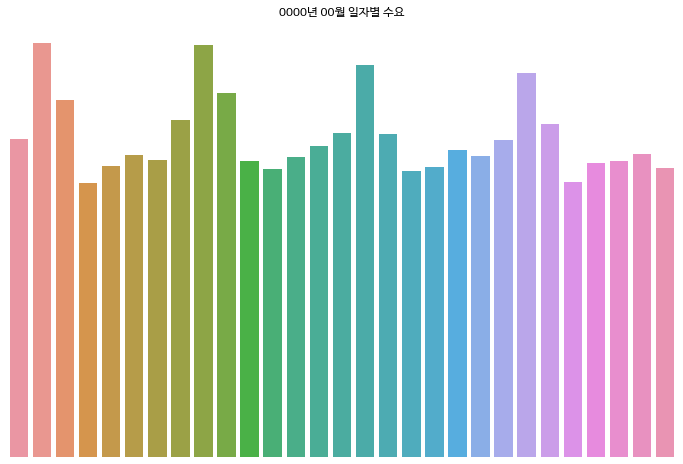

In [62]:
plt.figure(figsize=(12,8))

plt.title('0000년 00월 일자별 수요')
sns.countplot(data=df[df['month'] == month_temp], x='day')

plt.axis('off')

- 전반적으로 f요일의 수요가 다른 요일보다 높은 경향을 보임
- Ω일은 f일이지만 일부 데이터가 소실되어 수요를 충분히 표현하지 못한다고 판단됨
- Ω일 데이터 소실 판단 근거
  - time1 기준에서 일부 데이터가 완전히 주어지지 않음
  - time2가 Ω일인 데이터는 파악 가능하지만 time1에서는 파악 불가
  - Ω일에 해당하는 예측치를 보간하지 않고 삭제 예정
  (test셋에 들어갈 가능성이 있음)
  - 이용시간이 a시간 이내 사용자가 92.62% 이므로 time1 기준 Ω-1일 데이터 소실은 적을 것으로 판단됨 (아웃라이어로 간주하여도 된다고 판단함)
- Ω일 데이터를 삭제하고자 함

In [36]:
df['month_day'] = pd.to_datetime(df['time2']).dt.strftime("%Y-%m-%d")

In [37]:
df = df[df['month_day'] != Ω]

- time2 기준 Ω일 데이터를 삭제함

# 전체 데이터의 지역별 분석

### 1. 지역별 데이터 수 파악

(-0.5, 4.5, 0.0, 372562.05)

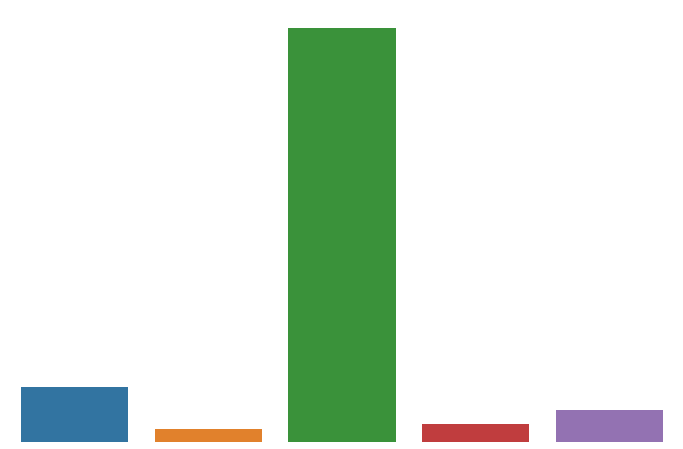

In [65]:
plt.figure(figsize=(12,8))

sns.countplot(data=df, x='city')

plt.axis('off')

In [66]:
city_name = ['cityA', 'cityB', 'cityC', 'cityD', 'cityE']

In [67]:
for i in city_name:
    print('{} 데이터 비율 : {:.2f} %'.format(i, len(df[df['city'] == i])/len(df) * 100))

cityA 데이터 비율 : 10.31 %
cityB 데이터 비율 : 2.33 %
cityC 데이터 비율 : 77.95 %
cityD 데이터 비율 : 3.34 %
cityE 데이터 비율 : 6.07 %


- 대부분의 데이터는 cityC에 치중되어 있음
- cityB의 데이터는 약 2.33% 데이터만 가지고 있음

### 2. 지역별 쏘카 이용 건수 파악

In [69]:
city_monthly_demand = df.pivot_table(index='month', values='time2', columns='city', aggfunc='count')

In [70]:
minmax_scaler = MinMaxScaler()
city_monthly_demand_scaled = minmax_scaler.fit_transform(city_monthly_demand)

In [79]:
city_monthly_demand_scaled = pd.DataFrame(city_monthly_demand_scaled)
city_monthly_demand_scaled.columns = ['cityC', 'cityB', 'cityD', 'cityA', 'cityE']
city_monthly_demand_scaled.index = range(1,12)

(0.5, 11.5, -0.05, 1.05)

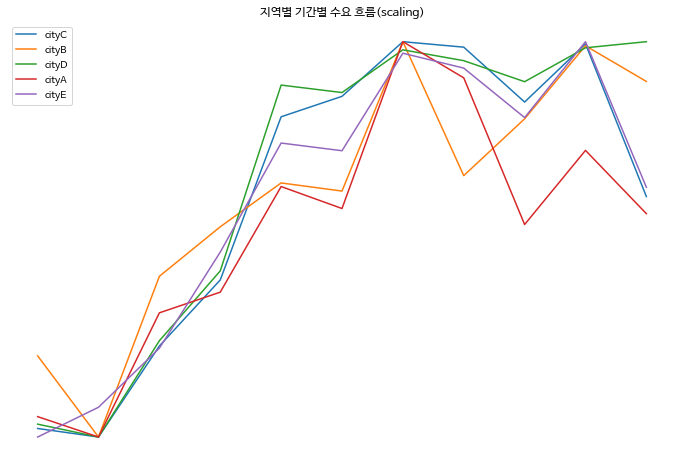

In [80]:
plt.figure(figsize=(12, 8))
plt.title('지역별 기간별 수요 흐름(scaling)')

plt.plot(city_monthly_demand_scaled)
plt.legend(city_monthly_demand_scaled.columns)

plt.axis('off')

- 지역별 수요 흐름은 비교적 비슷한 경향을 보임
- 쏘카의 주요 이용 시기가 있을 것으로 예상됨
- 기간별 흐름은 지역별로 비슷한 경향을 보이지만 미시적 관점으로는 지역별 큰 차이가 나타날 것으로 예상됨

# cityC

- 주어진 데이터에서 cityC는 cityF를 기준으로 인접된 지역이 다수임
- cityC 데이터에서는 지역간 연관성을 보기 어려울 것으로 판단됨

# cityB

- cityB에는 총 여러개 구로 나눠져있음
- 본 프로젝트에서는 cityB의 한 개의 구에 해당하는 데이터만 주어짐
- 구가 1개만 주어졌으므로 세부지역별 지역 특성을 보기 어려울 것으로 판단됨

# cityE

- cityE는 모든 구가 모두 표현됨 (구가 2개만 존재)

# cityD

- cityD의 세부지역은 하나만 주어짐
- 인근 지역 정보가 없으므로 지역 특성을 보기 어려울 것으로 판단됨

# cityA

- cityA의 모든 구군 데이터가 주어짐
  - 세부지역의 특징을 파악해보기 유리하다고 판단됨
- cityA은 팀 내의 편향이 적을 것으로 판단됨
  - 살았던 지역 또는 잘 알고 있는 지역은 경험에 따른 편향이 데이터를 바라보는데 영향을 줄 것으로 판단됨
  - 팀원 내 모든 구성원이 잘 아는 지역 또는 모든 구성원이 모르는 지역을 채택하고자 함
  - 현재 팀 내에서 cityB와 cityD 출신이 있으므로 해당 지역은 제외하고자 함
  - 팀 내에서 cityA에 대해 잘 아는 인원이 없으므로 편향이 가장 적은 지역일 것으로 판단됨
- **cityA를 미시적 지역으로 채택하여 본 프로젝트를 진행하고자 함**